In [1]:
'''
This notebook depicts the results of a vanilla sequence model trained on (s,a) -> s' examples.
MACHINE: stronghold
MODEL ID: N/A
Preprocessing: time standardization
'''

"\nThis notebook depicts the results of a vanilla sequence model trained on (s,a) -> s' examples.\nMACHINE: stronghold\nMODEL ID: N/A\nPreprocessing: time standardization\n"

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import numpy as np
import os
from vanilla_rnn import SequenceModel, Trainer
import torch
from utils.visualize import *
from utils.tools import *

In [4]:
root = os.getcwd()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
dataset = root+"/../datasets/vanilla_rnn"
X_train, A_train, Y_train = np.load(dataset+"/train/states.npy"), np.load(dataset+"/train/actions.npy"), np.load(dataset+"/train/next_states.npy")
X_val, A_val, Y_val = np.load(dataset+"/val/states.npy"), np.load(dataset+"/val/actions.npy"), np.load(dataset+"/val/next_states.npy")
X_test, A_test, Y_test = np.load(dataset+"/test/states.npy"), np.load(dataset+"/test/actions.npy"), np.load(dataset+"/test/next_states.npy")

X_train, Y_train = standardize_across_time(X_train), standardize_across_time(Y_train) 
X_val, Y_val = standardize_across_time(X_val), standardize_across_time(Y_val) 
X_test, Y_test = standardize_across_time(X_test), standardize_across_time(Y_test) 

# X_train, Y_train = standardize_across_samples(X_train), standardize_across_samples(Y_train) 
# X_val, Y_val = standardize_across_samples(X_val), standardize_across_samples(Y_val) 
# X_test, Y_test = standardize_across_samples(X_test), standardize_across_samples(Y_test) 

In [5]:
seq_model = SequenceModel(state_dim=21, action_dim=8, latent_dim=256, num_recurrent_layers=1, device=device).to(device)

In [6]:
trainer = Trainer(model=seq_model, device=device, learing_rate=1e-5)

In [7]:
trainer.load_checkpoint(path=root+"/../models/best_vanilla_rnn_time_standardization.pth")

In [7]:
trainer.train(train=(X_train, A_train, Y_train), val=(X_val, A_val, Y_val), epochs=1000, batch_size=200, shuffle=True)

EPOCH 0 -- Train Loss: 0.60532  Validation Loss: 0.49054
EPOCH 1 -- Train Loss: 0.43981  Validation Loss: 0.38509
EPOCH 2 -- Train Loss: 0.35567  Validation Loss: 0.33901
EPOCH 3 -- Train Loss: 0.32166  Validation Loss: 0.31772
EPOCH 4 -- Train Loss: 0.29576  Validation Loss: 0.28884
EPOCH 5 -- Train Loss: 0.27506  Validation Loss: 0.27775
EPOCH 6 -- Train Loss: 0.26142  Validation Loss: 0.26921
EPOCH 7 -- Train Loss: 0.25554  Validation Loss: 0.26509
EPOCH 8 -- Train Loss: 0.24897  Validation Loss: 0.25367
EPOCH 9 -- Train Loss: 0.24121  Validation Loss: 0.24127
EPOCH 10 -- Train Loss: 0.23126  Validation Loss: 0.23920
EPOCH 11 -- Train Loss: 0.22845  Validation Loss: 0.24283
EPOCH 12 -- Train Loss: 0.22825  Validation Loss: 0.23290
EPOCH 13 -- Train Loss: 0.22244  Validation Loss: 0.22960
EPOCH 14 -- Train Loss: 0.21931  Validation Loss: 0.22426
EPOCH 15 -- Train Loss: 0.21423  Validation Loss: 0.22008
EPOCH 16 -- Train Loss: 0.21081  Validation Loss: 0.22301
EPOCH 17 -- Train Loss: 

EPOCH 141 -- Train Loss: 0.15094  Validation Loss: 0.15597
EPOCH 142 -- Train Loss: 0.15174  Validation Loss: 0.15755
EPOCH 143 -- Train Loss: 0.15246  Validation Loss: 0.15631
EPOCH 144 -- Train Loss: 0.15181  Validation Loss: 0.15582
EPOCH 145 -- Train Loss: 0.15094  Validation Loss: 0.15570
EPOCH 146 -- Train Loss: 0.15100  Validation Loss: 0.15632
EPOCH 147 -- Train Loss: 0.15112  Validation Loss: 0.15468
EPOCH 148 -- Train Loss: 0.15005  Validation Loss: 0.15393
EPOCH 149 -- Train Loss: 0.14954  Validation Loss: 0.15486
EPOCH 150 -- Train Loss: 0.15003  Validation Loss: 0.15614
EPOCH 151 -- Train Loss: 0.15054  Validation Loss: 0.15396
EPOCH 152 -- Train Loss: 0.15008  Validation Loss: 0.15669
EPOCH 153 -- Train Loss: 0.15169  Validation Loss: 0.15542
EPOCH 154 -- Train Loss: 0.14963  Validation Loss: 0.15443
EPOCH 155 -- Train Loss: 0.14971  Validation Loss: 0.15324
EPOCH 156 -- Train Loss: 0.14911  Validation Loss: 0.15435
EPOCH 157 -- Train Loss: 0.14989  Validation Loss: 0.154

EPOCH 280 -- Train Loss: 0.13063  Validation Loss: 0.13441
EPOCH 281 -- Train Loss: 0.13096  Validation Loss: 0.13608
EPOCH 282 -- Train Loss: 0.13183  Validation Loss: 0.13492
EPOCH 283 -- Train Loss: 0.13006  Validation Loss: 0.13404
EPOCH 284 -- Train Loss: 0.12980  Validation Loss: 0.13510
EPOCH 285 -- Train Loss: 0.13120  Validation Loss: 0.13420
EPOCH 286 -- Train Loss: 0.13046  Validation Loss: 0.13395
EPOCH 287 -- Train Loss: 0.13005  Validation Loss: 0.13511
EPOCH 288 -- Train Loss: 0.13123  Validation Loss: 0.13529
EPOCH 289 -- Train Loss: 0.13066  Validation Loss: 0.13412
EPOCH 290 -- Train Loss: 0.12992  Validation Loss: 0.13293
EPOCH 291 -- Train Loss: 0.12947  Validation Loss: 0.13542
EPOCH 292 -- Train Loss: 0.13127  Validation Loss: 0.13361
EPOCH 293 -- Train Loss: 0.12907  Validation Loss: 0.13392
EPOCH 294 -- Train Loss: 0.13001  Validation Loss: 0.13557
EPOCH 295 -- Train Loss: 0.13060  Validation Loss: 0.13402
EPOCH 296 -- Train Loss: 0.13026  Validation Loss: 0.133

EPOCH 419 -- Train Loss: 0.12172  Validation Loss: 0.12386
EPOCH 420 -- Train Loss: 0.12023  Validation Loss: 0.12567
EPOCH 421 -- Train Loss: 0.12138  Validation Loss: 0.12587
EPOCH 422 -- Train Loss: 0.12250  Validation Loss: 0.12476
EPOCH 423 -- Train Loss: 0.12069  Validation Loss: 0.12559
EPOCH 424 -- Train Loss: 0.12123  Validation Loss: 0.12511
EPOCH 425 -- Train Loss: 0.12107  Validation Loss: 0.12626
EPOCH 426 -- Train Loss: 0.12175  Validation Loss: 0.12582
EPOCH 427 -- Train Loss: 0.12188  Validation Loss: 0.12519
EPOCH 428 -- Train Loss: 0.12131  Validation Loss: 0.12440
EPOCH 429 -- Train Loss: 0.12048  Validation Loss: 0.12554
EPOCH 430 -- Train Loss: 0.12093  Validation Loss: 0.12526
EPOCH 431 -- Train Loss: 0.12106  Validation Loss: 0.12372
EPOCH 432 -- Train Loss: 0.12034  Validation Loss: 0.12424
EPOCH 433 -- Train Loss: 0.12049  Validation Loss: 0.12529
EPOCH 434 -- Train Loss: 0.12110  Validation Loss: 0.12449
EPOCH 435 -- Train Loss: 0.12045  Validation Loss: 0.125

EPOCH 558 -- Train Loss: 0.11614  Validation Loss: 0.11962
EPOCH 559 -- Train Loss: 0.11567  Validation Loss: 0.12098
EPOCH 560 -- Train Loss: 0.11677  Validation Loss: 0.11944
EPOCH 561 -- Train Loss: 0.11499  Validation Loss: 0.12094
EPOCH 562 -- Train Loss: 0.11674  Validation Loss: 0.12012
EPOCH 563 -- Train Loss: 0.11524  Validation Loss: 0.12040
EPOCH 564 -- Train Loss: 0.11669  Validation Loss: 0.12074
EPOCH 565 -- Train Loss: 0.11705  Validation Loss: 0.11990
EPOCH 566 -- Train Loss: 0.11518  Validation Loss: 0.11956
EPOCH 567 -- Train Loss: 0.11498  Validation Loss: 0.11920
EPOCH 568 -- Train Loss: 0.11500  Validation Loss: 0.11948
EPOCH 569 -- Train Loss: 0.11507  Validation Loss: 0.11951
EPOCH 570 -- Train Loss: 0.11515  Validation Loss: 0.11912
EPOCH 571 -- Train Loss: 0.11520  Validation Loss: 0.12023
EPOCH 572 -- Train Loss: 0.11600  Validation Loss: 0.11930
EPOCH 573 -- Train Loss: 0.11511  Validation Loss: 0.12058
EPOCH 574 -- Train Loss: 0.11668  Validation Loss: 0.121

EPOCH 697 -- Train Loss: 0.11297  Validation Loss: 0.11697
EPOCH 698 -- Train Loss: 0.11346  Validation Loss: 0.11710
EPOCH 699 -- Train Loss: 0.11280  Validation Loss: 0.11811
EPOCH 700 -- Train Loss: 0.11322  Validation Loss: 0.11647
EPOCH 701 -- Train Loss: 0.11177  Validation Loss: 0.11603
EPOCH 702 -- Train Loss: 0.11201  Validation Loss: 0.11591
EPOCH 703 -- Train Loss: 0.11176  Validation Loss: 0.11544
EPOCH 704 -- Train Loss: 0.11169  Validation Loss: 0.11525
EPOCH 705 -- Train Loss: 0.11135  Validation Loss: 0.11610
EPOCH 706 -- Train Loss: 0.11235  Validation Loss: 0.11667
EPOCH 707 -- Train Loss: 0.11298  Validation Loss: 0.11558
EPOCH 708 -- Train Loss: 0.11149  Validation Loss: 0.11603
EPOCH 709 -- Train Loss: 0.11262  Validation Loss: 0.11555
EPOCH 710 -- Train Loss: 0.11114  Validation Loss: 0.11672
EPOCH 711 -- Train Loss: 0.11230  Validation Loss: 0.11685
EPOCH 712 -- Train Loss: 0.11250  Validation Loss: 0.11650
EPOCH 713 -- Train Loss: 0.11273  Validation Loss: 0.116

EPOCH 836 -- Train Loss: 0.11156  Validation Loss: 0.11341
EPOCH 837 -- Train Loss: 0.10923  Validation Loss: 0.11492
EPOCH 838 -- Train Loss: 0.11059  Validation Loss: 0.11473
EPOCH 839 -- Train Loss: 0.11080  Validation Loss: 0.11372
EPOCH 840 -- Train Loss: 0.10930  Validation Loss: 0.11456
EPOCH 841 -- Train Loss: 0.10994  Validation Loss: 0.11393
EPOCH 842 -- Train Loss: 0.10950  Validation Loss: 0.11250
EPOCH 843 -- Train Loss: 0.10843  Validation Loss: 0.11428
EPOCH 844 -- Train Loss: 0.11019  Validation Loss: 0.11338
EPOCH 845 -- Train Loss: 0.10940  Validation Loss: 0.11323
EPOCH 846 -- Train Loss: 0.10933  Validation Loss: 0.11268
EPOCH 847 -- Train Loss: 0.10908  Validation Loss: 0.11362
EPOCH 848 -- Train Loss: 0.10979  Validation Loss: 0.11208
EPOCH 849 -- Train Loss: 0.10828  Validation Loss: 0.11388
EPOCH 850 -- Train Loss: 0.10990  Validation Loss: 0.11296
EPOCH 851 -- Train Loss: 0.10883  Validation Loss: 0.11275
EPOCH 852 -- Train Loss: 0.10938  Validation Loss: 0.112

EPOCH 975 -- Train Loss: 0.10838  Validation Loss: 0.11176
EPOCH 976 -- Train Loss: 0.10835  Validation Loss: 0.11229
EPOCH 977 -- Train Loss: 0.10861  Validation Loss: 0.11328
EPOCH 978 -- Train Loss: 0.10919  Validation Loss: 0.11153
EPOCH 979 -- Train Loss: 0.10730  Validation Loss: 0.11032
EPOCH 980 -- Train Loss: 0.10656  Validation Loss: 0.11224
EPOCH 981 -- Train Loss: 0.10820  Validation Loss: 0.11083
EPOCH 982 -- Train Loss: 0.10704  Validation Loss: 0.11162
EPOCH 983 -- Train Loss: 0.10814  Validation Loss: 0.11083
EPOCH 984 -- Train Loss: 0.10687  Validation Loss: 0.11076
EPOCH 985 -- Train Loss: 0.10700  Validation Loss: 0.11198
EPOCH 986 -- Train Loss: 0.10837  Validation Loss: 0.11112
EPOCH 987 -- Train Loss: 0.10728  Validation Loss: 0.11222
EPOCH 988 -- Train Loss: 0.10822  Validation Loss: 0.11154
EPOCH 989 -- Train Loss: 0.10753  Validation Loss: 0.11070
EPOCH 990 -- Train Loss: 0.10708  Validation Loss: 0.11104
EPOCH 991 -- Train Loss: 0.10736  Validation Loss: 0.111

In [8]:
trainer.save_checkpoint(path=root+"/../models/best_vanilla_rnn_time_standardization.pth")

In [9]:
X_train=torch.from_numpy(X_train[:]).to(device)
A_train=torch.from_numpy(A_train[:]).to(device)
Y_train=torch.from_numpy(Y_train[:]).to(device)

X_val=torch.from_numpy(X_val[:]).to(device)
A_val=torch.from_numpy(A_val[:]).to(device)
Y_val=torch.from_numpy(Y_val[:]).to(device)

X_test=torch.from_numpy(X_test[:]).to(device)
A_test=torch.from_numpy(A_test[:]).to(device)
Y_test=torch.from_numpy(Y_test[:]).to(device)

In [10]:
# PREDICTIONS

In [11]:
n = 5
t=1
Y_hat = seq_model.foresee(x=X_test[n:n+1].data.cpu().numpy(), a=A_test[n:n+1].data.cpu().numpy(), lookahead=t)

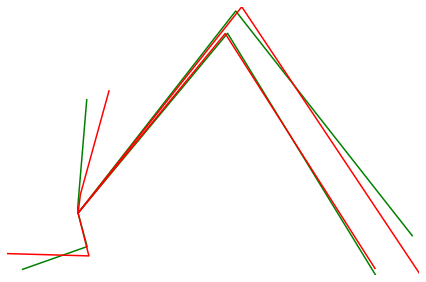

<Figure size 432x288 with 0 Axes>

In [12]:
compare_states(Y=Y_test[n], Y_hat=Y_hat[0], overlap=True)            # animation of joints

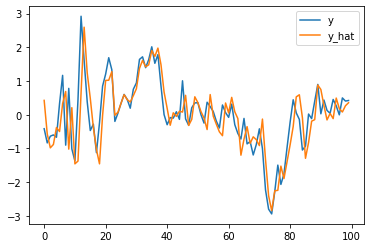

In [13]:
# VELOCITIES
plot_velocity_curve(true=Y_test[n, :, 0].data.cpu().numpy(), pred=Y_hat[0, :, 0]) # x-velocity

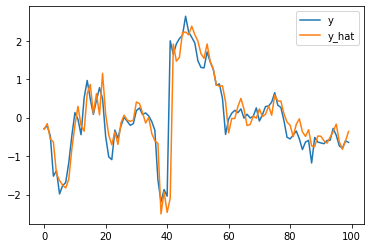

In [14]:
plot_velocity_curve(true=Y_test[n, :, 1].data.cpu().numpy(), pred=Y_hat[0, :, 1]) # y-velocity

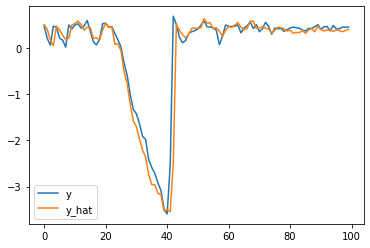

In [15]:
plot_velocity_curve(true=Y_test[n, :, 2].data.cpu().numpy(), pred=Y_hat[0, :, 2]) # z-velocity

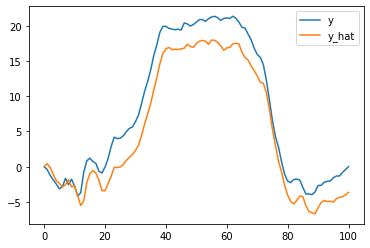

In [16]:
# POSITIONS
plot_position_curve(true=compute_position_from_velocity(Y_test[n, :, 0].data.cpu().numpy()), pred=compute_position_from_velocity(Y_hat[0, :, 0])) # x-position

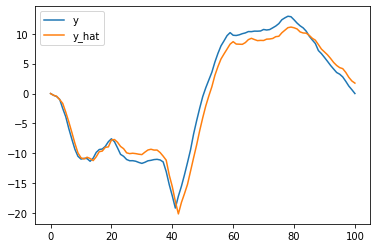

In [17]:
plot_position_curve(true=compute_position_from_velocity(Y_test[n, :, 1].data.cpu().numpy()), pred=compute_position_from_velocity(Y_hat[0, :, 1])) # y-position

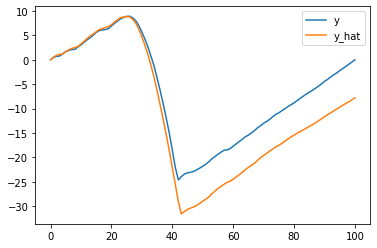

In [18]:
plot_position_curve(true=compute_position_from_velocity(Y_test[n, :, 2].data.cpu().numpy()), pred=compute_position_from_velocity(Y_hat[0, :, 2])) # z-position